In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

plt.style.use('belle2')
import numpy as np
import pdg
import root_pandas

treefile='../Ntuples/MC_e_ROE_Tuned_noTOP_50k.root'
df_B = root_pandas.read_root(treefile,key='B0')
df_B=df_B.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__'])
df_pi_signal = root_pandas.read_root(treefile, key='pi_roe')
#df_pi_signal = root_pandas.read_root(treefile, key='pi_roe_signal')
df_pi_signal=df_pi_signal.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__'])
df_pi_signal['isSignal'] = df_pi_signal['isSignal'].fillna(-1)
df_pi_signal['isCloneTrack'] = df_pi_signal['isCloneTrack'].fillna(-1)
#df_pi_others = root_pandas.read_root(treefile, key='pi_roe_others')
#df_pi_others=df_pi_others.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__'])
df_pi_signal['abs_dz']=df_pi_signal.dz.abs()
#df_pi_others['abs_dz']=df_pi_others.dz.abs()

def statistics(df):
    counts=df.count()
    mean=df.mean()
    std=df.std()
    return f'''counts = %d \nmean = %7.5f \nstd = %7.5f''' %(counts,mean,std)

Welcome to JupyROOT 6.24/00


In [ ]:
display(df_pi_signal[df_pi_signal.__event__==df_pi_signal.query('isCloneTrack==1').iloc[1].__event__])

In [2]:
df_pi_signal.isCloneTrack.value_counts()

 0.0    73113
-1.0     3299
 1.0     3050
Name: isCloneTrack, dtype: int64

In [11]:
df_pi_signal.query('isCloneTrack!=0').mcErrors.value_counts()

512.0    3299
0.0      1547
128.0     830
132.0     535
4.0       138
Name: mcErrors, dtype: int64

In [3]:
df_pi_signal.mcErrors.value_counts()

0.0      50688
128.0    18027
132.0     5350
512.0     3299
4.0       2098
Name: mcErrors, dtype: int64

In [ ]:
df_pi_signal.query('hasAncestorFromSignalSide==1').mcErrors.value_counts()

Text(0, 0.5, 'dz [cm]')

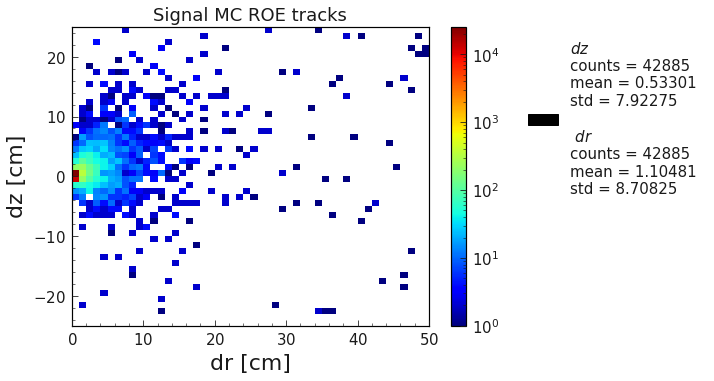

In [16]:
df_cut=df_pi_signal.query('isCloneTrack==0')
plt.title('Signal MC ROE tracks')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()
plt.xlabel('dr [cm]')
plt.ylabel('dz [cm]')

In [5]:
#df_gamma_signal = root_pandas.read_root(treefile, key='gamma_roe_signal')
df_gamma_signal = root_pandas.read_root(treefile, key='gamma_roe')
df_gamma_signal = df_gamma_signal.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__'])
df_gamma_signal['isSignal'] = df_gamma_signal['isSignal'].fillna(-1)
df_gamma_signal['pionID'] = df_gamma_signal['pionID'].fillna(-1)
df_gamma_signal['electronID_noTOP'] = df_gamma_signal['electronID_noTOP'].fillna(-1)
df_gamma_signal['clusterPulseShapeDiscriminationMVA'] = df_gamma_signal['clusterPulseShapeDiscriminationMVA'].fillna(-1)
#df_gamma_others = root_pandas.read_root(treefile, key='gamma_roe_others')
#df_gamma_others = df_gamma_others.drop_duplicates(subset=['__experiment__','__run__','__event__','__production__','__candidate__'])
df_gamma_signal.eval('clusterTimingRatio = clusterTiming / clusterErrorTiming', inplace=True)
#df_gamma_others.eval('clusterTimingRatio = clusterTiming / clusterErrorTiming', inplace=True)
#display(df_gamma_signal[df_gamma_signal.__event__==df_gamma_signal.query('mcErrors==4').iloc[0].__event__])

In [7]:
df_gamma_signal.query('isSignal!=1 and genMotherPDG==0 and genMotherID==0').mcErrors.value_counts()

512.0    38825
Name: mcErrors, dtype: int64

In [6]:
df_gamma_signal.mcErrors.value_counts()

0.0      65092
512.0    38825
132.0     9568
128.0     6829
4.0        329
Name: mcErrors, dtype: int64

In [15]:
df_gamma_signal.query('isSignal==0').mcErrors.value_counts()

132.0    9568
128.0    6829
4.0       329
Name: mcErrors, dtype: int64

In [10]:
df_gamma_signal.query('mcErrors==132').mcPDG.value_counts()

-13.0      2898
-11.0      2175
-211.0     1405
 211.0     1259
 13.0      1233
 11.0       592
-321.0        4
-2212.0       1
Name: mcPDG, dtype: int64

In [ ]:
df_gamma_signal.hasAncestorFromSignalSide.value_counts()

In [ ]:
df_gamma_signal.query('hasAncestorFromSignalSide==1').mcErrors.value_counts()

In [3]:
def plot_ROE_gamma(E,variable,xlimit):
    df_Ecut=df_gamma_signal.query(E)
    df_true=df_Ecut.query('isSignal==1')
    df_BeamBkg=df_Ecut.query('genMotherPDG==0 and genMotherID==0 and clusterTotalMCMatchWeight<0.025')
    df_HSO=df_Ecut.query('genMotherPDG==0 and genMotherID==0 and clusterTotalMCMatchWeight>0.053')
    df_misID_DIF = df_Ecut.query('isSignal==0')
    FWD_true=df_true.query('clusterReg==1')
    BRL_true=df_true.query('clusterReg==2')
    BWD_true=df_true.query('clusterReg==3')
    FWD_BeamBkg=df_BeamBkg.query('clusterReg==1')
    BRL_BeamBkg=df_BeamBkg.query('clusterReg==2')
    BWD_BeamBkg=df_BeamBkg.query('clusterReg==3')
    FWD_HSO=df_HSO.query('clusterReg==1')
    BRL_HSO=df_HSO.query('clusterReg==2')
    BWD_HSO=df_HSO.query('clusterReg==3')
    FWD_misID_DIF=df_misID_DIF.query('clusterReg==1')
    BRL_misID_DIF=df_misID_DIF.query('clusterReg==2')
    BWD_misID_DIF=df_misID_DIF.query('clusterReg==3')
    kwargs={'bins':50}
    fig,axs =plt.subplots(1,3,figsize=(16,5))
    fig.suptitle(f'Signal MC {variable} for {E}GeV')
    fig.supxlabel(f'{variable}')
    fig.supylabel('# of candidates per bin',x=0.06)
    axs[0].set_title(f'FWD')
    axs[0].hist(FWD_true[variable],label=f'$isSignal==1$ \ncounts = {FWD_true[variable].count()}',alpha=0.6, **kwargs)
    axs[0].hist(FWD_BeamBkg[variable],histtype='step',linewidth=1.5,label=f'BeamBkg \ncounts = {FWD_BeamBkg[variable].count()}',**kwargs)
    axs[0].hist(FWD_HSO[variable],histtype='step',linewidth=1.5,label=f'HadronSplitOff \ncounts = {FWD_HSO[variable].count()}',**kwargs)
    axs[0].hist(FWD_misID_DIF[variable],histtype='step',linewidth=1.5,label=f'misID+DIF \ncounts = {FWD_misID_DIF[variable].count()}',**kwargs)
    axs[1].set_title(f'BRL')
    axs[1].hist(BRL_true[variable],label=f'$isSignal==1$ \ncounts = {BRL_true[variable].count()}',alpha=0.6,**kwargs)
    axs[1].hist(BRL_BeamBkg[variable],histtype='step',linewidth=1.5,label=f'$BeamBkg$ \ncounts = {BRL_BeamBkg[variable].count()}',**kwargs)
    axs[1].hist(BRL_HSO[variable],histtype='step',linewidth=1.5,label=f'$HadronSplitOff$ \ncounts = {BRL_HSO[variable].count()}',**kwargs)
    axs[1].hist(BRL_misID_DIF[variable],histtype='step',linewidth=1.5,label=f'misID+DIF \ncounts = {BRL_misID_DIF[variable].count()}',**kwargs)
    axs[2].set_title(f'BWD')
    axs[2].hist(BWD_true[variable],label=f'$isSignal==1$ \ncounts = {BWD_true[variable].count()}',alpha=0.6,**kwargs)
    axs[2].hist(BWD_BeamBkg[variable],histtype='step',linewidth=1.5,label=f'$BeamBkg$ \ncounts = {BWD_BeamBkg[variable].count()}',**kwargs)
    axs[2].hist(BWD_HSO[variable],histtype='step',linewidth=1.5,label=f'$HadronSplitOff$ \ncounts = {BWD_HSO[variable].count()}',**kwargs)
    axs[2].hist(BWD_misID_DIF[variable],histtype='step',linewidth=1.5,label=f'misID+DIF \ncounts = {BWD_misID_DIF[variable].count()}',**kwargs)
    axs[0].grid()
    axs[1].grid()
    axs[2].grid()
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    plt.setp(axs, xlim=xlimit)
    #axs[0].legend(bbox_to_anchor=(1.5,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)

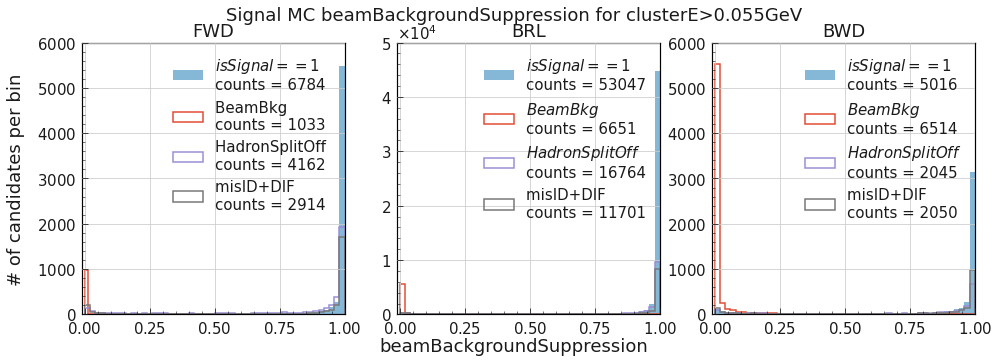

In [30]:
plot_ROE_gamma('clusterE>0.055','beamBackgroundSuppression',xlimit=(-0.01,1))

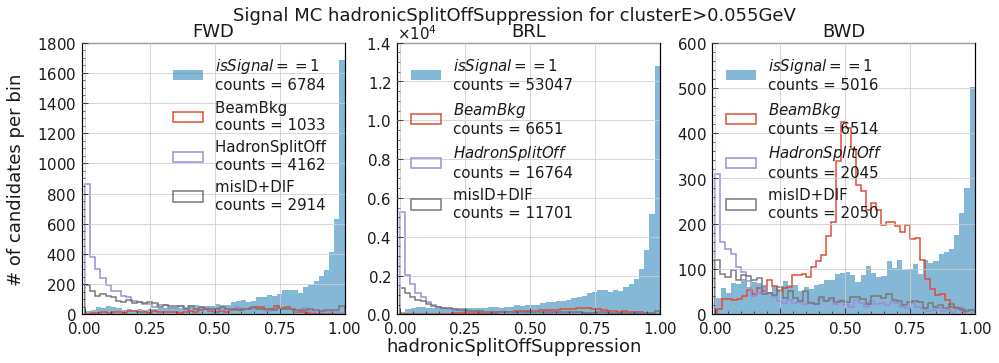

In [31]:
plot_ROE_gamma('clusterE>0.055','hadronicSplitOffSuppression',xlimit=(-0.01,1))

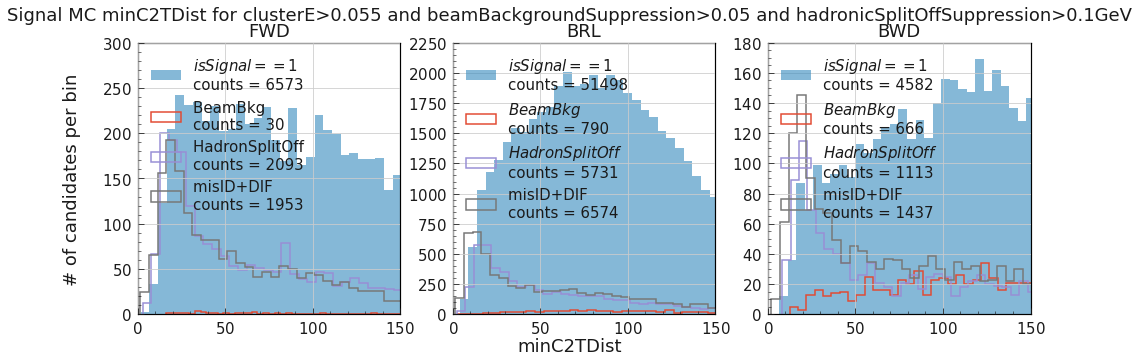

In [14]:
plot_ROE_gamma('clusterE>0.055 and beamBackgroundSuppression>0.05 and hadronicSplitOffSuppression>0.1','minC2TDist',xlimit=(-0.01,150))

In [ ]:
plot_ROE_gamma('clusterE>0.05','clusterPulseShapeDiscriminationMVA',xlimit=(-1,1))

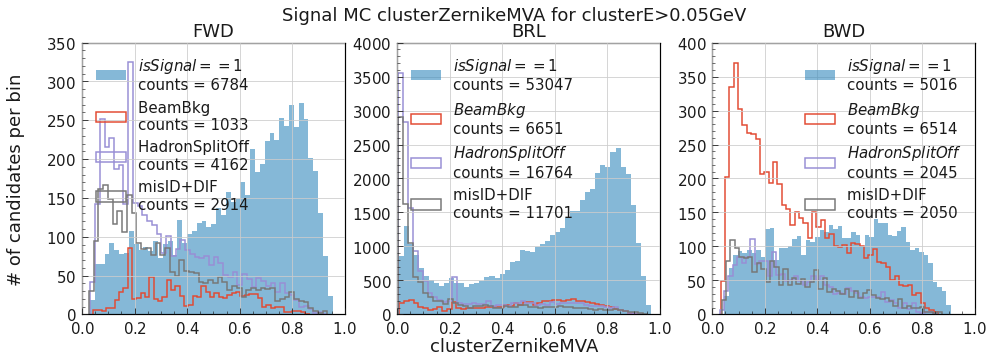

In [27]:
plot_ROE_gamma('clusterE>0.05','clusterZernikeMVA',xlimit=(0,1))

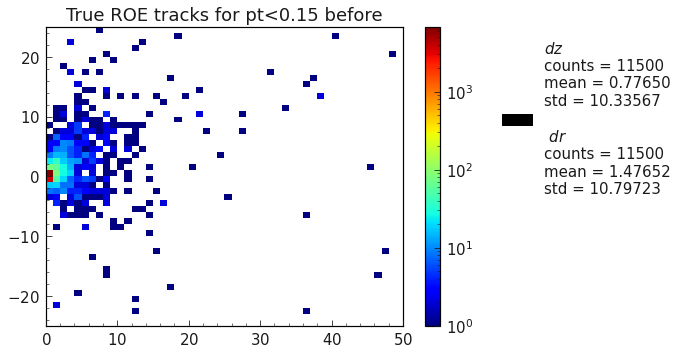

In [32]:
df_cut=df_pi_signal.query('pt<0.15')
plt.title('True ROE tracks for pt<0.15 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

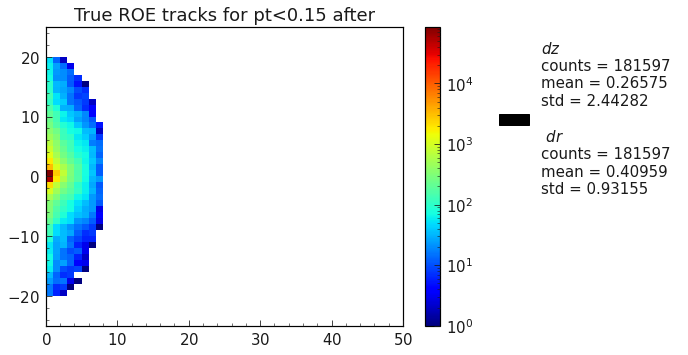

In [13]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal!=-1 and pt<0.15 and dr**2/64+dz**2/400<1')
plt.title('True ROE tracks for pt<0.15 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

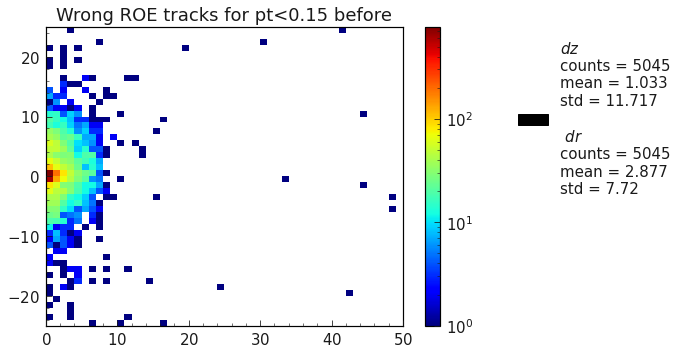

In [21]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal==-1 and pt<0.15')
plt.title('Wrong ROE tracks for pt<0.15 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

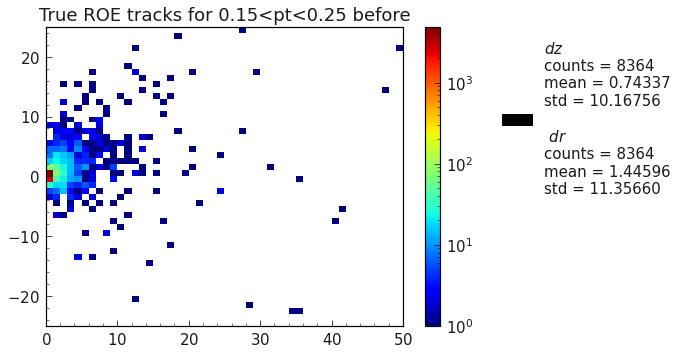

In [3]:
df_cut=df_pi_signal.query('0.15<pt<0.25')
plt.title('True ROE tracks for 0.15<pt<0.25 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

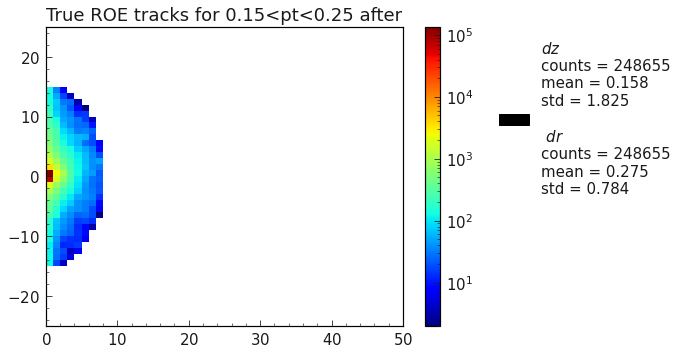

In [25]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal!=-1 and 0.15<pt<0.25 and dr**2/64+dz**2/225<1')
plt.title('True ROE tracks for 0.15<pt<0.25 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

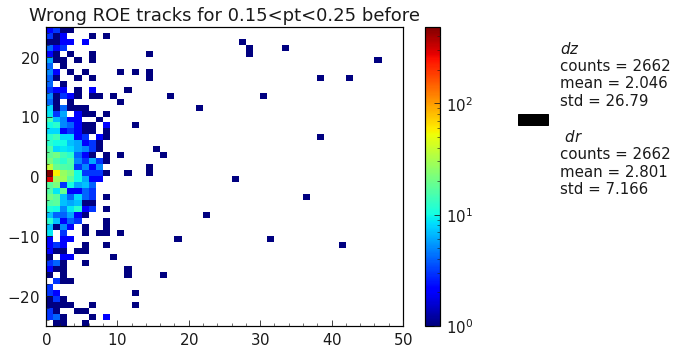

In [26]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal==-1 and 0.15<pt<0.25')
plt.title('Wrong ROE tracks for 0.15<pt<0.25 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,50),(-25,25)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

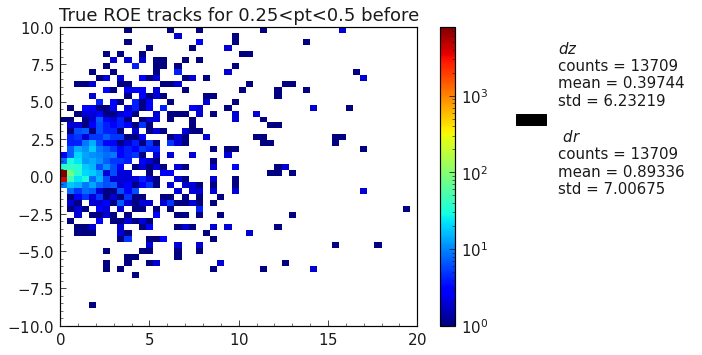

In [8]:
df_cut=df_pi_signal.query('0.25<pt<0.5')
plt.title('True ROE tracks for 0.25<pt<0.5 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,20),(-10,10)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

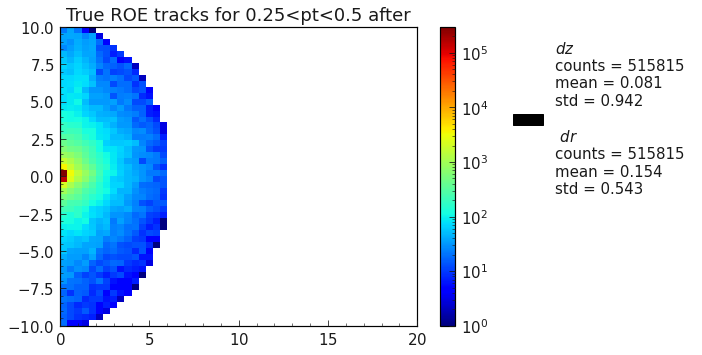

In [28]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal!=-1 and 0.25<pt<0.5 and dr**2/36+dz**2/100<1')
plt.title('True ROE tracks for 0.25<pt<0.5 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,20),(-10,10)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

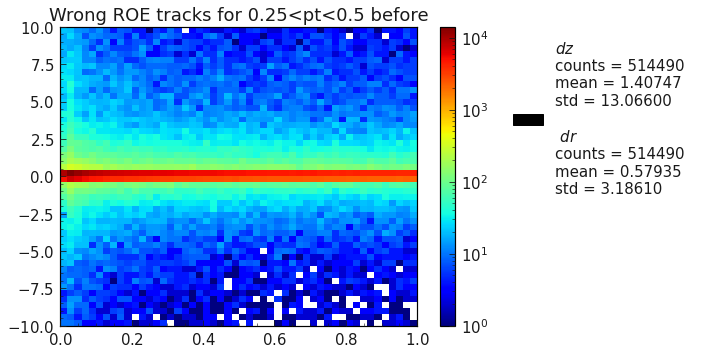

In [21]:
df_cut=df_pi_signal.query('pValue>=0.01 and isSignal!=-1 and 0.25<pt<0.5')
plt.title('Wrong ROE tracks for 0.25<pt<0.5 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.pValue, df_cut.dz,range=[(0,1),(-10,10)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

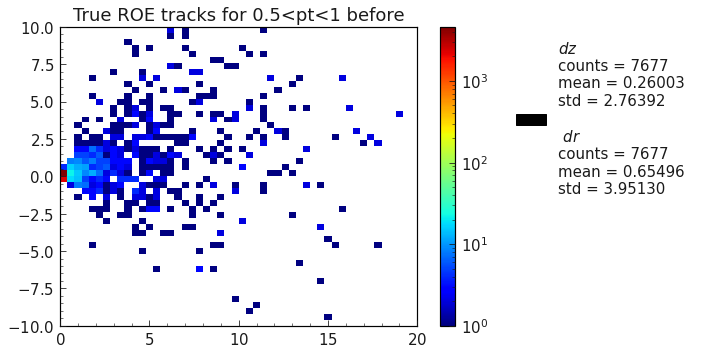

In [10]:
df_cut=df_pi_signal.query('0.5<pt<1')
plt.title('True ROE tracks for 0.5<pt<1 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,20),(-10,10)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

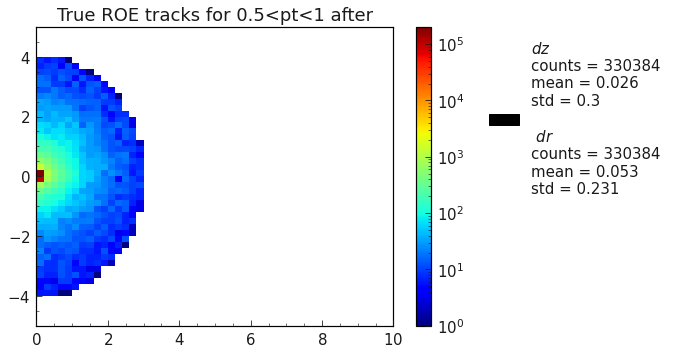

In [31]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal!=-1 and 0.5<pt<1 and dr**2/9+dz**2/16<1')
plt.title('True ROE tracks for 0.5<pt<1 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,10),(-5,5)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

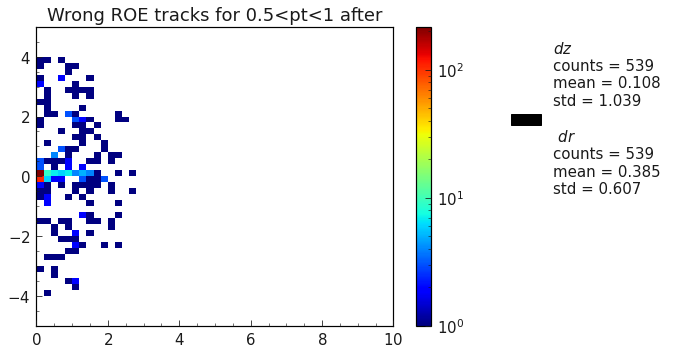

In [32]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal==-1 and 0.5<pt<1 and dr**2/9+dz**2/16<1')
plt.title('Wrong ROE tracks for 0.5<pt<1 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,10),(-5,5)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

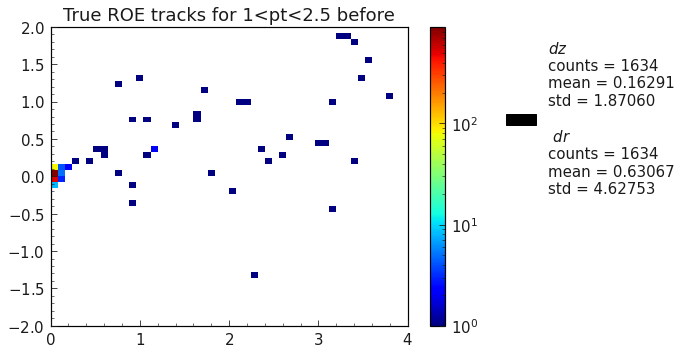

In [11]:
df_cut=df_pi_signal.query('1<pt<2.5')
plt.title('True ROE tracks for 1<pt<2.5 before')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,4),(-2,2)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

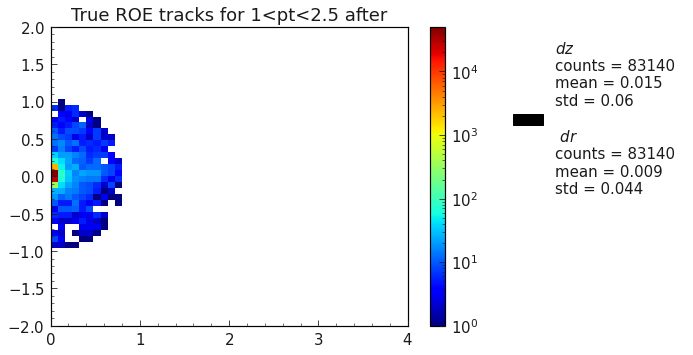

In [34]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal!=-1 and 1<pt<2.5 and dr**2/0.64+dz**2<1')
plt.title('True ROE tracks for 1<pt<2.5 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,4),(-2,2)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

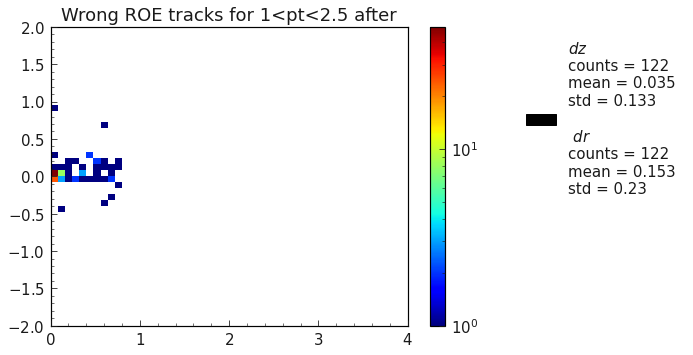

In [35]:
df_cut=df_pi_signal.query('pValue>=0.001 and isSignal==-1 and 1<pt<2.5 and dr**2/0.64+dz**2<1')
plt.title('Wrong ROE tracks for 1<pt<2.5 after')
black_patch = mpatches.Patch(color='black',label=f'$dz$ \n{statistics(df_cut["dz"])}\n\n $dr$ \n{statistics(df_cut["dr"])}')
plt.hist2d(df_cut.dr, df_cut.dz,range=[(0,4),(-2,2)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_pi_signal.query('pValue>=0.001 and pt<2.5')
plt.title('ROE tracks for signal mode')
black_patch = mpatches.Patch(color='black',label=f'$dr$ \n{statistics(df_cut["dr"])}\n\n $p_t$ \n{statistics(df_cut["pt"])}')
plt.hist2d(df_cut.pt, df_cut.dr,bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_pi_others.query('pValue>=0.001 and pt<2.5')
plt.title('ROE tracks for bkg mode')
black_patch = mpatches.Patch(color='black',label=f'$dr$ \n{statistics(df_cut["dr"])}\n\n $p_t$ \n{statistics(df_cut["pt"])}')
plt.hist2d(df_cut.pt, df_cut.dr,bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_pi_signal.query('pt<2.5 and dr<20 and pValue>0.001 and abs_dz<20')
plt.title('ROE tracks for signal mode')
black_patch = mpatches.Patch(color='black',label=f'$dr$ \n{statistics(df_cut["dr"])}\n\n $p_t$ \n{statistics(df_cut["pt"])}')
plt.hist2d(df_cut.pt, df_cut.dr,bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_pi_others.query('pt<2.5 and dr<20 and pValue>0.001 and abs_dz<20')
plt.title('ROE tracks for bkg mode')
black_patch = mpatches.Patch(color='black',label=f'$dr$ \n{statistics(df_cut["dr"])}\n\n $p_t$ \n{statistics(df_cut["pt"])}')
plt.hist2d(df_cut.pt, df_cut.dr,bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_pi_signal.query('pt<2.5 and dr<20 and pValue>0.001 and abs_dz<20')
plt.title('ROE tracks for signal mode')
black_patch = mpatches.Patch(color='black',label=f'$abs(dz)$ \n{statistics(df_cut["abs_dz"])}\n\n $p_t$ \n{statistics(df_cut["pt"])}')
plt.hist2d(df_cut.pt, df_cut.abs_dz,bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_pi_others.query('pt<2.5 and dr<20 and pValue>0.001 and abs_dz<20')
plt.title('ROE tracks for bkg mode')
black_patch = mpatches.Patch(color='black',label=f'$abs(dz)$ \n{statistics(df_cut["abs_dz"])}\n\n $p_t$ \n{statistics(df_cut["pt"])}')
plt.hist2d(df_cut.pt, df_cut.abs_dz,bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(1.8,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

In [ ]:
df_cut=df_gamma_signal.query('isSignal==1 and clusterE<0.5')
plt.title('True ROE cluster for signal mode')
black_patch = mpatches.Patch(color='black',label=f'$clusterTimingRatio$ \n{statistics(df_cut["clusterTimingRatio"])}\
                            \n\n$beamBackgroundProbabilityMVA$ \n{statistics(df_cut["beamBackgroundProbabilityMVA"])}')
plt.hist2d(df_cut.clusterTimingRatio, df_cut.beamBackgroundProbabilityMVA,range=[(-5,5),(0,1)],bins=50,cmap='jet',norm=colors.LogNorm())
plt.legend(handles=[black_patch],bbox_to_anchor=(2.1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)
plt.colorbar()

### Final Cuts and Best Candidate Selection

In [15]:
df_B.eval('p_D_l = D_CMS_p + e_CMS_p', inplace=True)
df_cut=df_B.query('B0_roeMbc_all>4').copy()
df_bestSelected=df_cut.loc[df_cut.groupby('__event__').B0_roeMbc_all.idxmax()]
#df_bestSelected['__ncandidates__']=df_bestSelected.groupby('__event__').transform(len)

In [16]:
# B decay
B_meson='B0_mcPDG==511 or B0_mcPDG==-511 or B0_mcPDG==521 or B0_mcPDG==-521'
tau_modes = 'DecayMode=="D_tau_nu" or DecayMode=="Dst_tau_nu" or DecayMode=="Dstst_tau_nu"'
e_modes = 'DecayMode=="D_e_nu" or DecayMode=="Dst_e_nu" or DecayMode=="Dstst_e_nu"'
mu_modes = 'DecayMode=="D_mu_nu" or DecayMode=="Dst_mu_nu" or DecayMode=="Dstst_mu_nu"'
bkg_misIdAndTwoD = 'DecayMode=="bkg"'
# Not B decay
bkg_combinatorial_oneBsignal = 'B0_mcPDG==300553 and DecayMode!="bkg"'
bkg_combinatorial_noBsignal = 'B0_mcPDG==300553 and DecayMode=="bkg"'
bkg_BDaughterDecay = 'B0_mcPDG!=511 and B0_mcPDG!=-511 and B0_mcPDG!=521 and B0_mcPDG!=-521 \
and B0_mcPDG!=300553 and B0_mcPDG!=0 and B0_isContinuumEvent!=1'
bkg_misId2='B0_mcPDG==0'
bkg_continuum = 'B0_isContinuumEvent==1'

df_B_mother = df_bestSelected.query(B_meson)
df_tau = df_B_mother.query(tau_modes)
df_e = df_B_mother.query(e_modes)
df_mu = df_B_mother.query(mu_modes)
df_bkg_misIdAndTwoD = df_B_mother.query(bkg_misIdAndTwoD)
# Not B decay
df_bkg_comb_oneBsignal = df_bestSelected.query(bkg_combinatorial_oneBsignal)
df_bkg_comb_noBsignal = df_bestSelected.query(bkg_combinatorial_noBsignal)
df_bkg_BDaughterDecay = df_bestSelected.query(bkg_BDaughterDecay)
df_bkg_misId2 = df_bestSelected.query(bkg_misId2)
df_bkg_continuum = df_bestSelected.query(bkg_continuum)

D_e_nu=df_e.query('DecayMode=="D_e_nu"')
D_mu_nu=df_mu.query('DecayMode=="D_mu_nu"')
D_tau_nu=df_tau.query('DecayMode=="D_tau_nu"')
Dst_e_nu=df_e.query('DecayMode=="Dst_e_nu"')
Dst_mu_nu=df_mu.query('DecayMode=="Dst_mu_nu"')
Dst_tau_nu=df_tau.query('DecayMode=="Dst_tau_nu"')
Dstst_e_nu=df_e.query('DecayMode=="Dstst_e_nu"')
Dstst_mu_nu=df_mu.query('DecayMode=="Dstst_mu_nu"')
Dstst_tau_nu=df_tau.query('DecayMode=="Dstst_tau_nu"')

In [59]:
def statistics(df):
    counts=df.count()
    mean=df.mean()
    std=df.std()
    return f'''counts = %d \nmean = %5.3f \nstd = %5.3f''' %(counts,mean,std)

kwarg={'bins':25, 'histtype':'step','lw':2}

def plot_components(variable):
    D_tau_nu[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu[variable])}')
    D_e_nu[variable].hist(label=f'e \n{statistics(D_e_nu[variable])}',**kwarg)
    df_mu[variable].hist(label=f'mu \n{statistics(df_mu[variable])}',**kwarg)
    df_bkg_misIdAndTwoD[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD[variable])}',**kwarg)
    df_bkg_comb_oneBsignal[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal[variable])}',**kwarg)
    df_bkg_comb_noBsignal[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal[variable])}',**kwarg)
    df_bkg_BDaughterDecay[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay[variable])}',**kwarg)
    df_bkg_misId2[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2[variable])}',**kwarg)
    df_bkg_continuum[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_components_withcut(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'e \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    df_mu.query(cut)[variable].hist(label=f'mu \n{statistics(df_mu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_signal(variable):
    D_tau_nu[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu[variable])}')
    Dst_tau_nu[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu[variable])}',**kwarg)
    Dstst_tau_nu[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu[variable])}',**kwarg)
    D_e_nu[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu[variable])}',**kwarg)
    Dst_e_nu[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu[variable])}',**kwarg)
    Dstst_e_nu[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=2, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_projection(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu.query(cut)[variable])}')
#    D_e_nu.query(cut)[variable].hist(label=f'D_e_nu \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
#    Dst_e_nu.query(cut)[variable].hist(label=f'Dst_e_nu \n{statistics(Dst_e_nu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
#    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
#    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
#    Dst_tau_nu.query(cut)[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu.query(cut)[variable])}',**kwarg)
    Dstst_e_nu.query(cut)[variable].hist(label=f'Dstst_e_nu \n{statistics(Dstst_e_nu.query(cut)[variable])}',**kwarg)
    Dstst_tau_nu.query(cut)[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=2, fancybox=True, shadow=True,labelspacing=1.5)

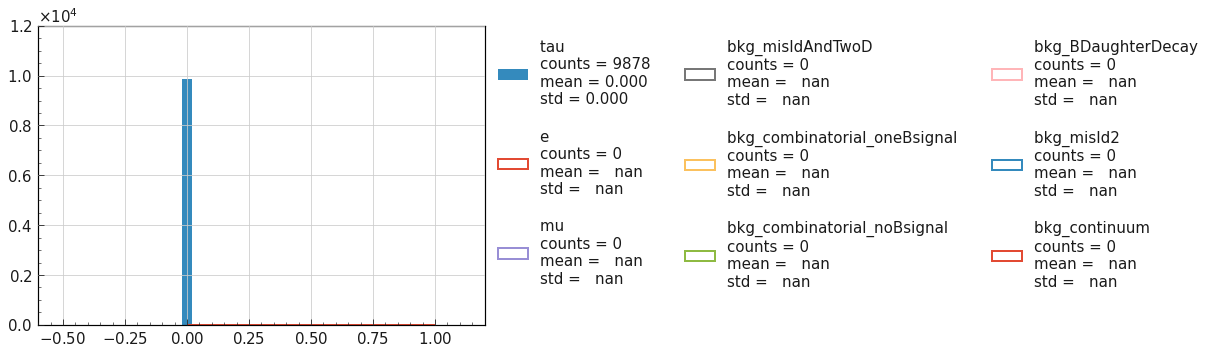

In [20]:
plot_components_withcut('B0_roeMbc_all>5.26 and abs(B0_roeDeltae_all)<1', 'B0_nROE_pi')

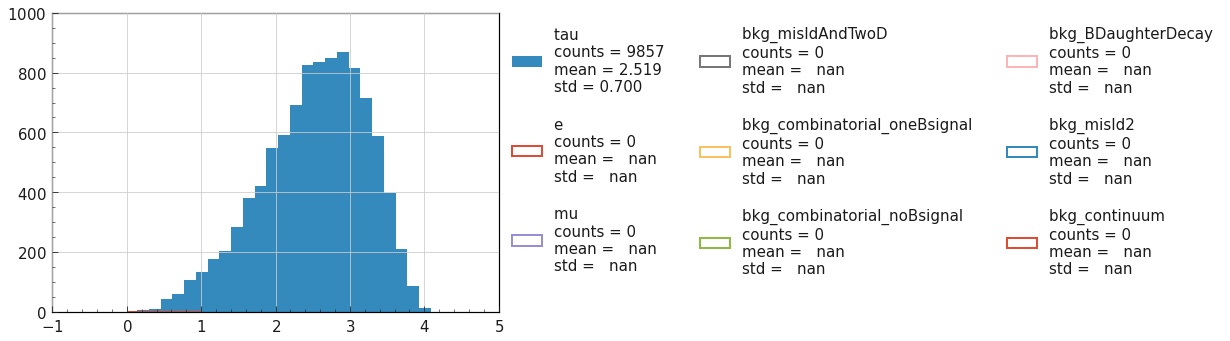

In [22]:
plot_components_withcut('B0_roeMbc_all>5.26 and abs(B0_roeDeltae_all)<0.5', 'p_D_l')

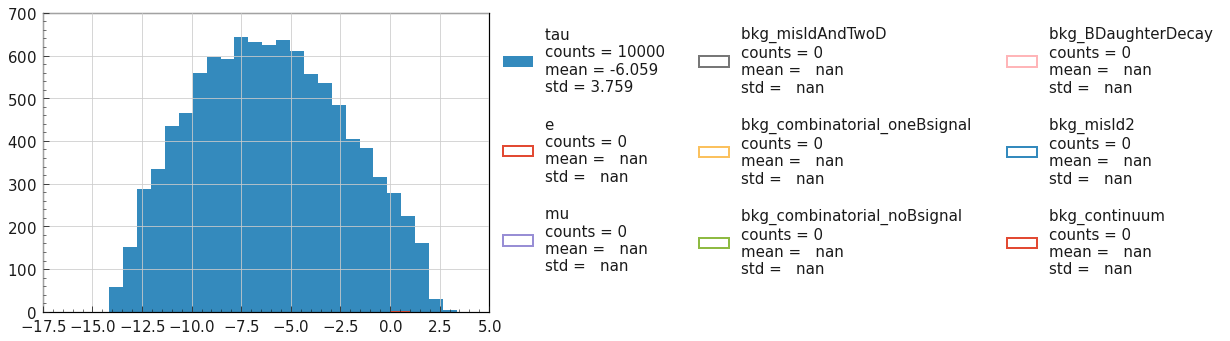

In [23]:
plot_components('MM2')

Text(0.5, 0, 'roeE* [GeV]')

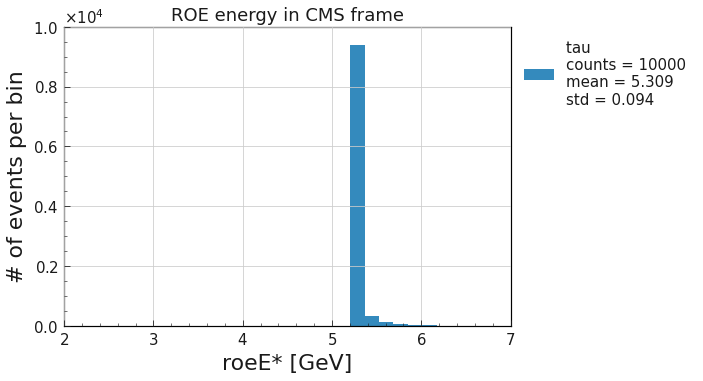

In [67]:
plot_components('B0_CMS_roeE_all')
plt.title('ROE energy in CMS frame')
plt.ylabel('# of events per bin')
plt.xlabel('roeE* [GeV]')

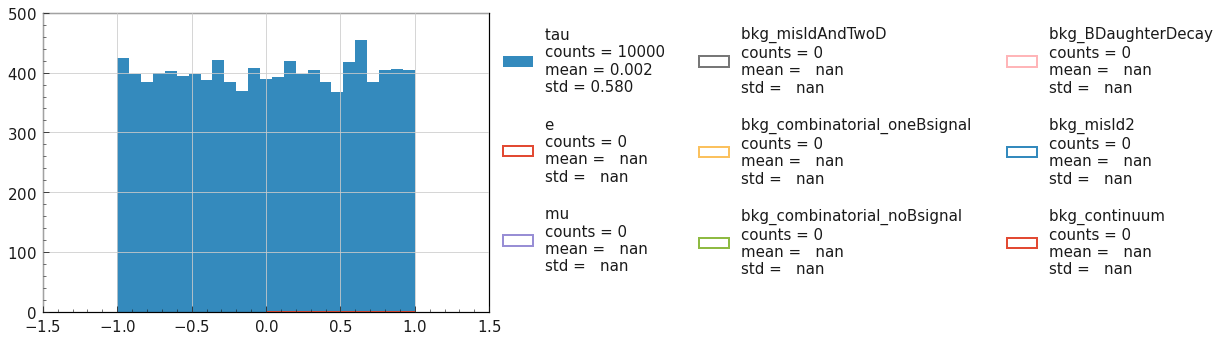

In [26]:
plot_components('cos_pmiss_z')

In [64]:
df_B.B0_CMS_roeP_all.describe()

count    10003.000000
mean         0.330732
std          0.072596
min          0.075453
25%          0.298192
50%          0.327605
75%          0.356109
max          2.488532
Name: B0_CMS_roeP_all, dtype: float64

Text(0.5, 0, '# of photons')

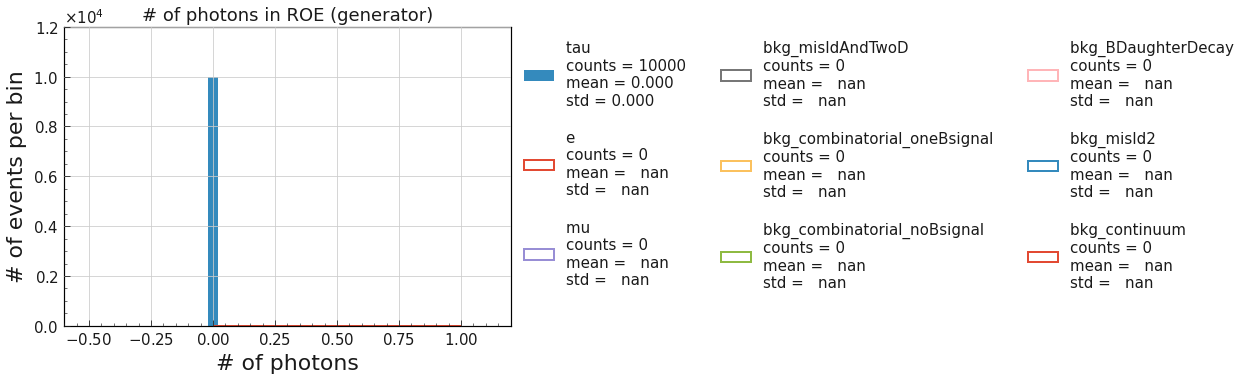

In [57]:
plot_components('B0_nROE_Photons_all')
plt.title('# of photons in ROE (generator)')
plt.ylabel('# of events per bin')
plt.xlabel('# of photons')
#plt.xlim(5,5.5)

In [ ]:
plot_components('B0_R2')

In [ ]:
plot_components('B0_thrustBm')

In [ ]:
plot_components('B0_thrustOm')

In [ ]:
plot_components('B0_cosTBTO')

In [ ]:
plot_components('B0_cosTBz')

In [ ]:
plot_components_withcut(cut='e_CMS_p<1.1 and B0_R2<0.25',variable='MM2')

In [ ]:
plot_components_withcut(cut='e_CMS_p>1.1',variable='MM2')

In [ ]:
name_list = [r'$D\tau_e\nu$',r'$D*\tau_e\nu$',r'$D**\tau_e\nu$',
             r'$De\nu$',r'$D*e\nu$',r'$D**e\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial','bkg_randomComb']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_e_nu,Dst_e_nu,Dstst_e_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb,df_bkg_randomComb]

df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5'

n_rows,n_cols = [3,3]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].set_title=name_list[k]
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).p_D_l, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        k+=1
plt.xlabel('$p_l + p_D}$')
plt.ylabel('withROE ${m_{missing}}^2$')

In [ ]:
name_list = [r'$D\tau_e\nu$',r'$D*\tau_e\nu$',r'$D**\tau_e\nu$',
             r'$De\nu$',r'$D*e\nu$',r'$D**e\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial','bkg_randomComb']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_e_nu,Dst_e_nu,Dstst_e_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb,df_bkg_randomComb]

df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5'

n_rows,n_cols = [3,3]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].set_title=name_list[k]
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).e_CMS_p, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,2.5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        k+=1
plt.xlabel('$p_l$')
plt.ylabel('withROE ${m_{missing}}^2$')

In [ ]:
np.reshape(df.columns,(1,375))

## 1. $De$

In [ ]:
De_info= df[['B0_CMS_p','B0_CMS_E','B0_deltaE','B0_Mbc', 'B0_SigM', 'B0_InvM',
             'B0_dM', 'B0_Q','B0_dQ','B0_isSignal', 'B0_missingMass2OfEvent', 
             'B0_m2Recoil', "B0_R2","B0_thrustBm","B0_thrustOm","B0_cosTBTO","B0_cosTBz","B0_isContinuumEvent",
             'B0_vtxReChi2', 'B0_vtxDD','B0_vtxDDSig','DecayMode','MM2']]
De_info.describe()

In [ ]:
df.__event__.nunique()

In [ ]:
df_bestSelected.query('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5').groupby(['B0_mcPDG','DecayMode']).__event__.nunique().unstack()

In [12]:
df2=df_B.groupby(['__production__','__event__']).__production__.nunique().unstack(level=0,fill_value=0)
df2

__production__,20768,20769,20770,21194
__event__,,,,
2,1,1,0,0
3,1,0,0,0
4,1,1,0,0
5,1,0,0,0
6,1,0,0,0
...,...,...,...,...
977216,0,0,0,1
977510,0,0,0,1
979479,0,0,0,1


In [ ]:
df2.transpose().plot.bar(rot=0,table=True)

In [ ]:
plot_components('B0_CMS_p')

In [ ]:
plot_components('B0_cos_pB')

In [ ]:
plot_components('B0_dM')
#plt.yscale('log', nonposy='clip')

In [ ]:
plot_components('B0_Mbc')

In [ ]:
plot_components('B0_CMS_E')

In [ ]:
plot_components('B0_deltaE')

In [ ]:
plot_components('B0_vtxReChi2')

In [ ]:
plot_components('B0_vtxDD')

In [ ]:
plot_components('B0_vtxDDSig')

## 2. Tag B

### 2.1 Tag Kimematics

In [ ]:
roe_kin= df[['B0_CMS_roeE_my_mask','B0_roeM_my_mask', 'B0_CMS_roeP_my_mask', 'B0_CMS_roePt_my_mask',
              'B0_roeMbc_my_mask','B0_roeDeltae_my_mask',
              'B0_roeCharge_my_mask','B0_roeNeextra_my_mask', 'B0_roeEextra_my_mask',
              'B0_nROE_Charged_my_mask', 'B0_nROE_ECLClusters_my_mask','nROE_KLMClusters',
              'B0_nROE_NeutralECLClusters_my_mask', 'B0_nROE_NeutralHadrons_my_mask',
              'B0_nROE_Photons_my_mask','B0_nROE_Tracks_my_mask', 'B0_nROE_RemainingTracks_my_mask']]
roe_kin.describe()

In [ ]:
plot_components('B0_roeMbc_my_mask')

In [ ]:
plot_signal('B0_roeMbc_my_mask')

In [ ]:
plot_components_withcut('abs(B0_roeDeltae_my_mask)<0.5','B0_roeMbc_my_mask')

In [ ]:
plot_components('B0_roeDeltae_my_mask')

In [ ]:
plot_components_withcut('B0_roeMbc_my_mask>5.2','B0_roeDeltae_my_mask')

In [ ]:
plot_components_withcut('B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5','B0_CMS_roeE_my_mask')

In [ ]:
plot_components('B0_roeNeextra_my_mask')

In [ ]:
plot_components('B0_roeEextra_my_mask')

In [ ]:
plot_components_withcut('B0_roeEextra_my_mask<5 and B0_roeNeextra_my_mask<5','B0_roeDeltae_my_mask')

In [ ]:
plot_components('B0_nROE_ECLClusters_my_mask')

In [ ]:
plot_components('B0_nROE_Photons_my_mask')

In [ ]:
plot_components_withcut('B0_nROE_ECLClusters_my_mask<22 and B0_nROE_Photons_my_mask<20','B0_roeDeltae_my_mask')

In [ ]:
plot_components_withcut('B0_roeEextra_my_mask<5 and B0_roeNeextra_my_mask<5 and B0_nROE_ECLClusters_my_mask<22 and B0_nROE_Photons_my_mask<20','B0_roeDeltae_my_mask')

In [ ]:
plot_components_withcut('B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5 and B0_roeEextra_my_mask<5 and B0_roeNeextra_my_mask<5 and B0_nROE_ECLClusters_my_mask<22 and B0_nROE_Photons_my_mask<20','MM2')

### 2.2 Tag Vertex

In [ ]:
roe_vertex = df[['B0_TagVLBoost', 'B0_TagVLBoostErr', 'B0_TagVOBoost',
                 'B0_TagVOBoostErr', 'B0_TagVpVal', 'B0_TagVNDF', 'B0_TagVChi2',
                 'B0_TagVChi2IP', 'B0_TagVx', 'B0_TagVxErr', 'B0_TagVy',
                 'B0_TagVyErr', 'B0_TagVz','B0_TagVzErr']]
roe_vertex.describe()

In [ ]:
plot_components('B0_TagVChi2IP')

## 3. Flavor Tagger

In [ ]:
ft_info= df[['B0bar_FBDT_qrCombined','B0bar_FANN_qrCombined', 'B0bar_qrMC', 'B0bar_mcFlavorOfOtherB']]
ft_info.describe()

In [ ]:
df.B0bar_qrMC.value_counts()

In [ ]:
df.B0bar_mcFlavorOfOtherB.value_counts()

In [ ]:
df.query('B0bar_mcFlavorOfOtherB==1').B0bar_FBDT_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $B^0$').legend()
df.query('B0bar_mcFlavorOfOtherB==-1').B0bar_FBDT_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $\barB^0$').legend()

In [ ]:
df.query('B0bar_mcFlavorOfOtherB==1').B0bar_FANN_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $B^0$').legend()
df.query('B0bar_mcFlavorOfOtherB==-1').B0bar_FANN_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $\barB^0$').legend()

## 4. $D^+$

In [ ]:
D_info=df[['D_CMS_pt','D_CMS_p', 'D_CMS_E', 'D_isSignal', 'D_mcErrors', 'D_mcPDG',
           'D_dM', 'D_BFM', 'D_BFInvM', 'D_vtxReChi2', 'D_vtxNDF']]
D_info.describe()

In [ ]:
df.groupby(['B0_isSignal','D_isSignal']).D_isSignal.count().unstack(level=-1,fill_value=0)

In [ ]:
plot_components('D_BFM')

In [ ]:
plot_signal('D_BFM')

In [ ]:
plot_components('D_CMS_p')

In [ ]:
plot_components('D_CMS_E')

In [ ]:
plot_components('D_vtxReChi2')

## 5. $e^-$

In [ ]:
e_info=df[['e_CMS_pt', 'e_CMS_p','e_CMS_E', 'e_M', 'e_ErrM', 'e_SigM', 'e_InvM', 'e_isSignal',
           'e_mcErrors', 'e_mcPDG', 'e_dM', 'e_isBremsCorrected']]
e_info.describe()

In [ ]:
df.groupby(['B0_isSignal','e_isSignal']).e_isSignal.count().unstack(level=-1,fill_value=0)

In [ ]:
plot_components('e_CMS_p')

In [ ]:
B0_cuts = 'B0_Mbc>4.9 and B0_deltaE>-3 and B0_vtxReChi2<5'
D_cuts = 'and D_vtxReChi2<6.5'
l_cuts = 'and e_CMS_p>0.2'
roe_cuts = 'and B0_roeMbc_my_mask>4.9 and abs(B0_roeDeltae_my_mask)<1.5'
#and B0_roeCharge_my_mask==0'
all_cuts = B0_cuts + D_cuts + l_cuts + roe_cuts

## 7. Missing Mass^2

In [ ]:
def naive_mm2(data):
    # Energy and nominal mass
    E_B = df_event.Ecms.mean() / 2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc = data.B0_Mbc
    # 3 momentum
    p_Dl_x = data.D_CMS_px + data.e_CMS_px
    p_Dl_y = data.D_CMS_py + data.e_CMS_py
    p_Dl_z = data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_Dl2 = p_Dl_x**2 + p_Dl_y**2 + p_Dl_z**2
    p_Dl = np.sqrt(p_Dl2)
    p_B = np.sqrt(E_B**2 - M_B**2)
    m_Dl2 = E_Dl**2 - p_Dl2
    # Calculating the final quantities
    naive_missing_m2 = Mbc**2 + m_Dl2 - 2*E_B*E_Dl
    cos_theta_BY = -naive_missing_m2 / (2*p_B*p_Dl)
    return {'mm2': naive_missing_m2, 'cos': cos_theta_BY}

In [ ]:
# MM2 with ROE = (E_Y4S/2 - E_Y)^2 - (p_cm - p_roe - p_Y)^2
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_1(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Y = data.D_CMS_E + data.e_CMS_E
    E_miss = E_B - E_Y
    # 3 momentum
    p_x = data.B0_CMS_roePx_my_mask + data.D_CMS_px + data.e_CMS_px
    p_y = data.B0_CMS_roePy_my_mask + data.D_CMS_py + data.e_CMS_py
    p_z = data.B0_CMS_roePz_my_mask + data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_miss2 = p_x**2 + p_y**2 + p_z**2
    # Calculating the final quantities
    withROE_missing_m2 = E_miss**2 - p_miss2
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

In [ ]:
# MM2 with ROE = Mbc_roe^2 + M_Y^2 - 2*(E_Y4S/2)*E_Y - 2*(p_roe dot p_Y)
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_2(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Y = data.D_CMS_E + data.e_CMS_E
    Mbc_roe = data.B0_roeMbc_my_mask
    # Calculating M_Y^2
    p_Yx = data.D_CMS_px + data.e_CMS_px
    p_Yy = data.D_CMS_py + data.e_CMS_py
    p_Yz = data.D_CMS_pz + data.e_CMS_pz
    p_Y2 = p_Yx**2 + p_Yy**2 + p_Yz**2
    m_Y2 = E_Y**2 - p_Y2
    # dot product
    p_xdot = data.B0_CMS_roePx_my_mask * p_Yx
    p_ydot = data.B0_CMS_roePy_my_mask * p_Yy
    p_zdot = data.B0_CMS_roePz_my_mask * p_Yz
    p_dot = p_xdot + p_ydot + p_zdot
    # Calculating the final quantities
    withROE_missing_m2 = Mbc_roe**2 + m_Y2 - 2*E_B*E_Y - 2*p_dot
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

In [ ]:
variable='mm2'
sig_mm2_1=withROE_mm2_1(df_bestSelected.query(sig))[variable]
bkg_mm2_1=withROE_mm2_1(df_bestSelected.query(bkg))[variable]
sig_mm2_2=withROE_mm2_2(df_bestSelected.query(sig))[variable]
bkg_mm2_2=withROE_mm2_2(df_bestSelected.query(bkg))[variable]
plt.scatter(sig_mm2_1,sig_mm2_2,marker='.',color='blue',label='signal')
plt.scatter(bkg_mm2_1,bkg_mm2_2,marker='.',color='green',label='bkg')
a=sig_mm2_1.min()
b=sig_mm2_1.max()
plt.plot([a,b],[a,b],color='red',label='y=x')
plt.legend()

In [ ]:
h_l=plt.hist2d(df_bkg_comb.e_CMS_p, df_bkg_comb.MM2,
               range=[[0,2.5], [-3,10]], bins=25,cmap='jet',norm=colors.LogNorm())
plt.colorbar()
#plt.savefig('2dplot.pdf')

In [ ]:
h_l=plt.hist2d(D_tau_nu.e_CMS_p, D_tau_nu.MM2,
               range=[[0,2.5], [-3,10]], bins=25,cmap='jet',norm=colors.LogNorm())
plt.colorbar()

In [ ]:
plot(df_dict=df_best_dict,calculation=withROE_mm2_2,variable='mm2')